<a href="https://colab.research.google.com/github/nikhil-1605/ML-Assignment/blob/main/ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!cp /content/drive/MyDrive/cleaned_vehicles.csv /content

In [ ]:
data = pd.read_csv("/content/cleaned_vehicles.csv")

In [ ]:
data = data.iloc[:,1:]

In [ ]:
data.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
0,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,rwd,full-size,truck,black
1,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,other,4wd,full-size,pickup,black
2,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,other,4wd,full-size,pickup,silver
3,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,automatic,4wd,mid-size,truck,grey
4,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,other,4wd,mid-size,pickup,red


In [ ]:
data.shape

(144017, 13)

#As we can see that now the cleaned data has the data of 144017 Used cars.

#**Let's determine which columns are Categorical so that we can encode them into Integer or One Hot Encoded Values.**

In [ ]:
categorical_columns = list()

for single_column in data.columns:

  if data[single_column].dtype == "object":
    categorical_columns.append(single_column)

In [ ]:
print(categorical_columns)

['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'transmission', 'drive', 'size', 'type', 'paint_color']


###Let's first encode the categorical values of **all those columns which are Ordinal or their values have some Order associated with them and hence they can be compared**, such as the column of ```cylinders``` which can be compared such as ```3 cylinders``` or ```4 cylinders```. So, the following columns are Ordinal:

###```condition```
###```cylinders```
###```transmission```
###```drive```
###```size```

###Rest of the columns are Nominal.

##Therefore, **categorical columns are of two types: Nominal (having no order associated with their values) as well as Ordinal (having some order associated with them).**


#**Let's encode the values of Ordinal Columns now.**

###But, first let us determine that what are the unique values available in all the Ordinal Columns.

In [ ]:
for single_column in ["condition","cylinders","transmission","drive","size"]:

  print("The unique values in {} column are {}".format(single_column,
                                                       data[single_column].unique()))

The unique values in condition column are ['excellent' 'good' 'like new' 'new' 'fair' 'salvage']
The unique values in cylinders column are ['6 cylinders' '8 cylinders' '4 cylinders' '5 cylinders' '10 cylinders'
 '3 cylinders' 'other' '12 cylinders']
The unique values in transmission column are ['automatic' 'other' 'manual']
The unique values in drive column are ['rwd' '4wd' 'fwd']
The unique values in size column are ['full-size' 'mid-size' 'compact' 'sub-compact']


###Let's create the dictionary of mappings for all the categorical values to Integers, in all the Ordinal Columns.

In [ ]:
condition_encoding_dict = {'excellent':6, 'good':3, 'like new':4, 'new':5, 'fair':2, 'salvage':1}
cylinders_encoding_dict = {'6 cylinders':6, '8 cylinders':8, '4 cylinders':4, '5 cylinders':5,
                           '10 cylinders':10, '3 cylinders':3, 'other':7, '12 cylinders':12}
transmission_encoding_dict = {'automatic':3, 'other':2, 'manual':1}
drive_encoding_dict = {'rwd':2, '4wd':3, 'fwd':1}
size_encoding_dict = {'full-size':4, 'mid-size':3, 'compact':1, 'sub-compact':2}

###Let's replace all the categorical values in all the Ordinal columns, with their respective integer mappings.

In [ ]:
data["condition"].replace(to_replace=condition_encoding_dict.keys(),
                          value=condition_encoding_dict.values(),inplace=True)

data["cylinders"].replace(to_replace=cylinders_encoding_dict.keys(),
                          value=cylinders_encoding_dict.values(),inplace=True)

data["transmission"].replace(to_replace=transmission_encoding_dict.keys(),
                             value=transmission_encoding_dict.values(),inplace=True)

data["drive"].replace(to_replace=drive_encoding_dict.keys(),
                      value=drive_encoding_dict.values(),inplace=True)

data["size"].replace(to_replace=size_encoding_dict.keys(),
                     value=size_encoding_dict.values(),inplace=True)

#**Let's now encode all the Nominal Columns with the help of One Hot Encoding.**

###Let's first that see how many unique values are there in each of the Nominal Columns.

In [ ]:
for single_column in ["manufacturer","model","fuel","type","paint_color"]:

  print("The number of unique values in {} column are {}".format(single_column,
                                                       data[single_column].unique().shape[0]))

The number of unique values in manufacturer column are 41
The number of unique values in model column are 14487
The number of unique values in fuel column are 5
The number of unique values in type column are 13
The number of unique values in paint_color column are 12


###**As all the Nominal columns except, ```model``` have very less number of unique values so we can One Hot Encode all the values of rest of the columns.**

###Let's see what can we do with the values of ```model``` column.

###**Let's first encode all the unique values in the ```model``` column and visualize the frequency distribution of the integer values in ```model``` column.**

In [ ]:
data["model"].replace(to_replace=data["model"].unique(),
                      value=list(range(data["model"].unique().shape[0])),
                      inplace=True)

Text(0, 0.5, 'Frequency of Integer Labels')

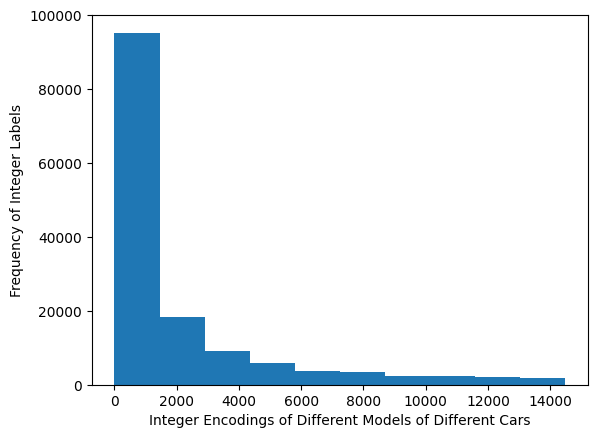

In [ ]:
plt.hist(data["model"])
plt.xlabel("Integer Encodings of Different Models of Different Cars")
plt.ylabel("Frequency of Integer Labels")

##As can be visualized that **all the integer mappings roughly below 2000 are occupying majority of the area under the Frequency Distribution** and thats the piece of information which we are going to use **to determine the various integer mappings that need to be One Hot Encoded and rest of the Integer mappings will be merged into a single integer mapping.**   

##**We will One Hot Encode only those top 'k' (Top 'k' most frequently occuring)Integer mappings seperately which are contributing to majority (let's say 70%) of the area under the curve of Frequency Distribution and merge rest of them into a single integer value.**

In [ ]:
models_freq_dist = dict(data["model"].value_counts())

##And the best part is that all the integer mappings we computed above are by default arranged in descending order according to their frequencies and **we simply have to get the list of all the integer mappings whose frequencies when summed up are contributing to 70% of the area under the Frequency Distribution.**

In [ ]:
area_cut_off = 0.7
top_models = list()
total_area = 0
total_frequency = data.shape[0]

for k,v in models_freq_dist.items():

  if (total_area/total_frequency) > area_cut_off:
    break

  top_models.append(k)

  total_area += models_freq_dist[k]

In [ ]:
k = len(top_models)
print(k)

773


##**Therefore, it can be said that there are 773 top most frequently occurring models whose frequencies when summed up contribute to 70% of the area under the Frequency Distribution.**  

##Let's assign a unique integer value to each of the integer mappings till index 772 (k-1) and then after that because we need to merge all the integer mappings, assign the index 773 to all of them.

In [ ]:
updated_mapping_dict = dict()

for i,item in enumerate(models_freq_dist.items()):

  if i <= (k-1):
    updated_mapping_dict[item[0]] = i
  else:
    updated_mapping_dict[item[0]] = k

In [ ]:
data["model"].replace(to_replace=updated_mapping_dict.keys(),
                       value=updated_mapping_dict.values(),inplace=True)

In [ ]:
data.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
0,15000,2013.0,ford,131,6,6,gas,128000.0,3,2,4,truck,black
1,27990,2012.0,gmc,165,3,8,gas,68696.0,2,3,4,pickup,black
2,34590,2016.0,chevrolet,66,3,6,gas,29499.0,2,3,4,pickup,silver
3,35000,2019.0,toyota,6,6,6,gas,43000.0,3,3,3,truck,grey
4,29990,2016.0,chevrolet,88,3,6,gas,17302.0,2,3,3,pickup,red


##Let's finally concatenate the 774 columns of One Hot Encodings of integer mappings available in ```model``` column. For that let's create a function which will serve as a generic function for One Hot Encoding the integer mappings in rest of the columns too.

In [ ]:
def convert_to_ohe_df(column_name):

  model_unique_values = data[column_name].unique().shape[0]
  identity_matrix = np.eye(model_unique_values,model_unique_values)
  ohe_models = identity_matrix[data[column_name]]
  df_column_names = [column_name+str(i) for i in range(model_unique_values)]
  column_df = pd.DataFrame(data=ohe_models,columns=df_column_names)

  return column_df

##Let's Integer Encode remaining columns so that we can One Hot Encode them.

In [ ]:
for single_column in ["manufacturer","fuel","type","paint_color"]:

  column_unique_values = data[single_column].unique()
  data[single_column].replace(to_replace=column_unique_values,
                              value=list(range(column_unique_values.shape[0])),
                              inplace=True)

In [ ]:
data.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
0,15000,2013.0,0,131,6,6,0,128000.0,3,2,4,0,0
1,27990,2012.0,1,165,3,8,0,68696.0,2,3,4,1,0
2,34590,2016.0,2,66,3,6,0,29499.0,2,3,4,1,1
3,35000,2019.0,3,6,6,6,0,43000.0,3,3,3,0,2
4,29990,2016.0,2,88,3,6,0,17302.0,2,3,3,1,3


In [ ]:
for single_column in ["manufacturer","model","fuel","type","paint_color"]:

  column_df = convert_to_ohe_df(single_column)
  data.drop(labels=single_column,axis=1,inplace=True)
  data = pd.concat([data,column_df],axis=1)

In [ ]:
data.head()

,price,year,condition,cylinders,odometer,transmission,drive,size,manufacturer0,manufacturer1,...,paint_color2,paint_color3,paint_color4,paint_color5,paint_color6,paint_color7,paint_color8,paint_color9,paint_color10,paint_color11
0,15000,2013.0,6,6,128000.0,3,2,4,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27990,2012.0,3,8,68696.0,2,3,4,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34590,2016.0,3,6,29499.0,2,3,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35000,2019.0,6,6,43000.0,3,3,3,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29990,2016.0,3,6,17302.0,2,3,3,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##**Let's also transform the ```year``` column of the pandas dataframe into something which represents how much old the car is by subtracting year of the oldest car in the dataset from the year of each car** or by subtracting the year when the first commercial car was introduced, that is 1886.

In [ ]:
data["year"] = data["year"].max() - data["year"]

In [ ]:
data.head()

,price,year,condition,cylinders,odometer,transmission,drive,size,manufacturer0,manufacturer1,...,paint_color2,paint_color3,paint_color4,paint_color5,paint_color6,paint_color7,paint_color8,paint_color9,paint_color10,paint_color11
0,15000,9.0,6,6,128000.0,3,2,4,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27990,10.0,3,8,68696.0,2,3,4,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34590,6.0,3,6,29499.0,2,3,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35000,3.0,6,6,43000.0,3,3,3,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29990,6.0,3,6,17302.0,2,3,3,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.to_csv("/content/updated_cleaned_vehicles.csv",index=False)

In [ ]:
!cp /content/updated_cleaned_vehicles.csv /content/drive/MyDrive/updated_cleaned_vehicles.csv

In [ ]:
!cp /content/drive/MyDrive/updated_cleaned_vehicles.csv /content/updated_cleaned_vehicles.csv

##Let's filter out those input feature columns which have high pearson correlation with the ```price``` column.  

In [ ]:
data = pd.read_csv("/content/updated_cleaned_vehicles.csv")

In [ ]:
pearson_corr = list()

for single_column in data.columns:
  pearson_corr.append(data["price"].corr(data[single_column]))

relevant_columns_idx = np.argwhere(np.abs(np.array(pearson_corr))>10**(-3))

In [ ]:
relevant_columns_idx[:,0]

array([  0,   1,   2,   3,   4,   5,   6,   7,  10,  11,  14,  79,  80,
       392, 677, 822, 824, 828, 829, 831, 833, 834, 841, 842, 843, 844,
       845, 846, 849])

In [ ]:
data = data.iloc[:,relevant_columns_idx[:,0]]

In [ ]:
data.head()

,price,year,condition,cylinders,odometer,transmission,drive,size,manufacturer2,manufacturer3,...,type3,type5,type6,paint_color0,paint_color1,paint_color2,paint_color3,paint_color4,paint_color5,paint_color8
0,15000,9.0,6,6,128000.0,3,2,4,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27990,10.0,3,8,68696.0,2,3,4,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34590,6.0,3,6,29499.0,2,3,4,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,35000,3.0,6,6,43000.0,3,3,3,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,29990,6.0,3,6,17302.0,2,3,3,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<Figure size 2500x2500 with 0 Axes>

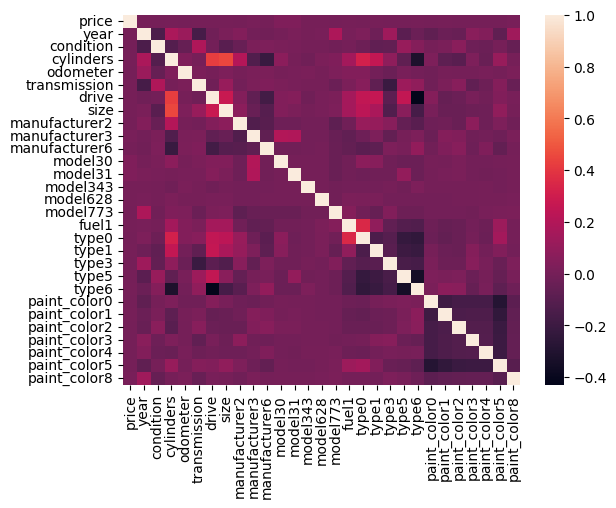

<Figure size 2500x2500 with 0 Axes>

In [ ]:
sns.heatmap(data.corr(),xticklabels=True,yticklabels=True)
plt.figure(figsize=(25,25))

In [ ]:
def apply_pca(X,preserved_variance_percentage):

  unprojected_X = np.array(X)
  X_cov = np.array(X.cov())
  Q_lambda_QT = np.linalg.svd(X_cov)
  total_variance = np.sum(Q_lambda_QT[1])
  variance_sum = 0
  num_eigen_vectors = 1

  if preserved_variance_percentage == 1:
    projected_X = np.matmul(unprojected_X,Q_lambda_QT[0])
    projected_X = pd.DataFrame(data=projected_X,
                             columns=["feature_"+str(i) for i in range(X.shape[1])])
  else:
    for variance in Q_lambda_QT[1]:

      if (variance_sum/total_variance) > preserved_variance_percentage:
        break

      variance_sum += variance
      num_eigen_vectors += 1

    projected_X = np.matmul(unprojected_X,Q_lambda_QT[0][0:num_eigen_vectors])

    projected_X = pd.DataFrame(data=projected_X,
                             columns=["feature_"+str(i) for i in range(num_eigen_vectors)])

  return projected_X

In [ ]:
projected_X = apply_pca(data.iloc[:,1:],1)

In [ ]:
projected_X.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27
0,-128000.000046,8.336764,-5.396368,7.936306,-1.921892,0.656334,2.044020,0.699555,-0.365512,-0.809605,...,0.417637,0.208996,-0.114746,0.152937,0.223341,0.363636,-0.023918,0.035444,-0.000359,0.001875
1,-68696.000053,9.773139,-8.048243,5.483828,-1.009030,0.047769,1.374294,0.959974,-0.376544,-0.854252,...,0.206042,0.222005,0.093576,0.170104,0.171800,0.359965,-0.020675,0.037958,-0.001070,0.002006
2,-29499.000032,5.929575,-6.486878,4.989063,-1.707194,-0.377520,1.360032,0.562313,-0.069371,-0.915054,...,0.286847,0.221343,0.178151,0.167851,0.155316,0.365430,-0.013133,0.028415,-0.001524,0.001084
3,-43000.000015,2.787767,-5.440617,7.882380,-0.997664,-0.289317,2.310288,0.326435,-0.321492,-1.043018,...,0.775104,0.364170,0.135871,0.189760,0.144541,0.367713,-0.030671,0.101225,-0.002155,0.001702
4,-17302.000032,5.995816,-6.147015,4.926680,-0.771019,-0.513018,1.440252,0.453133,-0.031678,-0.900111,...,0.218546,0.273607,0.191080,0.176608,0.159067,0.372598,-0.013143,0.026857,-0.001659,0.001175


In [ ]:
projected_data = pd.concat([projected_X,data["price"]],axis=1)

In [ ]:
projected_data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,price
0,-128000.000046,8.336764,-5.396368,7.936306,-1.921892,0.656334,2.044020,0.699555,-0.365512,-0.809605,...,0.208996,-0.114746,0.152937,0.223341,0.363636,-0.023918,0.035444,-0.000359,0.001875,15000
1,-68696.000053,9.773139,-8.048243,5.483828,-1.009030,0.047769,1.374294,0.959974,-0.376544,-0.854252,...,0.222005,0.093576,0.170104,0.171800,0.359965,-0.020675,0.037958,-0.001070,0.002006,27990
2,-29499.000032,5.929575,-6.486878,4.989063,-1.707194,-0.377520,1.360032,0.562313,-0.069371,-0.915054,...,0.221343,0.178151,0.167851,0.155316,0.365430,-0.013133,0.028415,-0.001524,0.001084,34590
3,-43000.000015,2.787767,-5.440617,7.882380,-0.997664,-0.289317,2.310288,0.326435,-0.321492,-1.043018,...,0.364170,0.135871,0.189760,0.144541,0.367713,-0.030671,0.101225,-0.002155,0.001702,35000
4,-17302.000032,5.995816,-6.147015,4.926680,-0.771019,-0.513018,1.440252,0.453133,-0.031678,-0.900111,...,0.273607,0.191080,0.176608,0.159067,0.372598,-0.013143,0.026857,-0.001659,0.001175,29990


<Figure size 2500x2500 with 0 Axes>

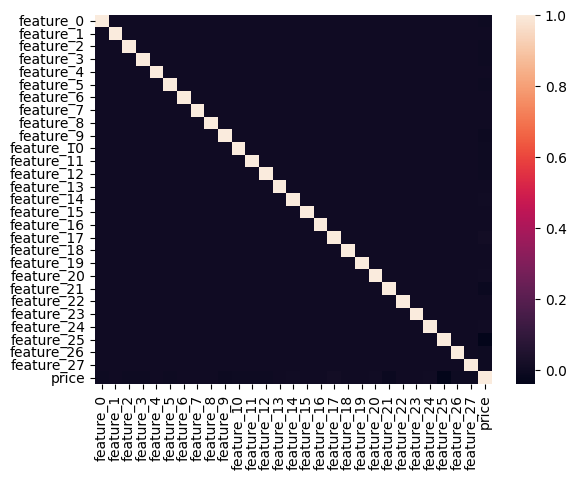

<Figure size 2500x2500 with 0 Axes>

In [ ]:
sns.heatmap(projected_data.corr(),xticklabels=True,yticklabels=True)
plt.figure(figsize=(25,25))

##Now, we are going to split this data into Training and Testing Data with 70 % of the rows in Training Data and remaining 30 % in the Testing Data. Therefore, $N_\text{train} = 0.7 \times 144017 = 100811$ and $N_\text{test} = (144017 - 100811) = 43206$

In [ ]:
training_data_len = int(0.7 * projected_data.shape[0])
training_data = projected_data.iloc[0:training_data_len,:]

testing_data = projected_data.iloc[training_data_len:,:]

In [ ]:
training_data.shape

(100811, 29)

In [ ]:
testing_data.shape

(43206, 29)

In [ ]:
training_data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,price
0,-128000.000046,8.336764,-5.396368,7.936306,-1.921892,0.656334,2.044020,0.699555,-0.365512,-0.809605,...,0.208996,-0.114746,0.152937,0.223341,0.363636,-0.023918,0.035444,-0.000359,0.001875,15000
1,-68696.000053,9.773139,-8.048243,5.483828,-1.009030,0.047769,1.374294,0.959974,-0.376544,-0.854252,...,0.222005,0.093576,0.170104,0.171800,0.359965,-0.020675,0.037958,-0.001070,0.002006,27990
2,-29499.000032,5.929575,-6.486878,4.989063,-1.707194,-0.377520,1.360032,0.562313,-0.069371,-0.915054,...,0.221343,0.178151,0.167851,0.155316,0.365430,-0.013133,0.028415,-0.001524,0.001084,34590
3,-43000.000015,2.787767,-5.440617,7.882380,-0.997664,-0.289317,2.310288,0.326435,-0.321492,-1.043018,...,0.364170,0.135871,0.189760,0.144541,0.367713,-0.030671,0.101225,-0.002155,0.001702,35000
4,-17302.000032,5.995816,-6.147015,4.926680,-0.771019,-0.513018,1.440252,0.453133,-0.031678,-0.900111,...,0.273607,0.191080,0.176608,0.159067,0.372598,-0.013143,0.026857,-0.001659,0.001175,29990


In [ ]:
X_train_transpose = np.array(training_data.iloc[:,0:projected_data.shape[1]-1])
y_train = np.array(training_data["price"]).reshape(-1,1)

X_test_transpose = np.array(testing_data.iloc[:,0:projected_data.shape[1]-1])
y_test = np.array(testing_data["price"]).reshape(-1,1)

In [ ]:
X_train_transpose.shape

(100811, 28)

In [ ]:
X_train_transpose

array([[-1.28000000e+05,  8.33676365e+00, -5.39636816e+00, ...,
         3.54442597e-02, -3.58706757e-04,  1.87489288e-03],
       [-6.86960001e+04,  9.77313871e+00, -8.04824270e+00, ...,
         3.79583479e-02, -1.06950846e-03,  2.00644234e-03],
       [-2.94990000e+04,  5.92957491e+00, -6.48687786e+00, ...,
         2.84151209e-02, -1.52428342e-03,  1.08355933e-03],
       ...,
       [-1.00901000e+05,  1.14168285e+01, -2.46865231e+00, ...,
         2.67118036e-02, -4.72671968e-04,  1.10420509e-03],
       [-3.41250000e+04,  3.83430866e+00, -5.84184390e+00, ...,
         3.30762852e-02, -1.00799308e-03,  2.54373343e-03],
       [-9.99900035e+03,  6.70396264e+01, -6.07461792e+00, ...,
         3.76082033e-02,  4.93438453e-05,  2.84134347e-03]])

##The dataset has finally the following Input Features:

##$1.$ **```manufacturer3```** $(x_1)$
##$2.$ **```model30```** $(x_2)$
##$3.$ **```model31```** $(x_3)$

#The Input feature row vector of any $i^{th}$ row of the data in this case is given as:
#\begin{equation}
\vec{x}^i =
\begin{bmatrix}
x_1^i \cdots x_j^i \cdots x_{3}^i
\end{bmatrix}
\end{equation}

#Therefore,
#\begin{equation}
X_\text{train}^T =
\begin{bmatrix}
\longleftarrow \vec{x}^1 \longrightarrow \\
\vdots \\
x_1^i \cdots x_j^i \cdots x_{3}^i \\
\vdots \\
\longleftarrow \vec{x}^{N_\text{train}} \longrightarrow
\end{bmatrix}
\end{equation}




In [ ]:
y_train.shape

(100811, 1)

#And,
#\begin{equation}
\begin{bmatrix}
y_1 \\
\vdots \\
y_i \\
\vdots \\
y_{N_\text{train}}
\end{bmatrix}
\end{equation}

#Now, we will be **training a Linear Regression Model on our training data using Gradient Descent Algorithm** using the following update in a **while or for loop until this update rule converges to the Minima of the $MSE$, that is $(\theta_0^*, \vec{\theta}^*)$** also known as Loss Function:

#\begin{equation}
\theta_{final} = \theta_{initial} - \epsilon \cdot \frac{\partial MSE}{\partial \theta}
\end{equation}

#Where,
$\frac{\partial MSE}{\partial \theta_0}$


In [ ]:
N_train = y_train.shape[0]

In [ ]:
def del_by_del_thetas(theta_0,theta):

  y_pred = (theta_0 + np.matmul(X_train_transpose,theta))
  error_vector_transpose = np.transpose(y_pred - y_train)

  del_by_del_theta = (2/N_train)*np.transpose(np.matmul(error_vector_transpose,
                                                        X_train_transpose))
  del_by_del_theta_0 = (2/N_train)*np.sum(error_vector_transpose)

  return [del_by_del_theta_0,del_by_del_theta]

In [ ]:
def mae(theta_0,theta):

  y_pred = (theta_0 + np.matmul(X_train_transpose,theta))
  abs_error_vector = np.abs(y_pred - y_train)

  return np.mean(abs_error_vector)

#Now, Finally we are going **train Linear Regression Model using Gradient Descent Algorithm.**

In [ ]:
epsilon = 10**(-15)
tol = 10**(-6)
theta_0_initial = 5000
theta_initial = np.zeros((X_train_transpose.shape[1],1))
iteration = 0

while True:

  initial_gradients = del_by_del_thetas(theta_0_initial,
                                        theta_initial)

  theta_0_final = theta_0_initial - (epsilon * initial_gradients[0])
  theta_final = theta_initial - (epsilon * initial_gradients[1])

  initial_gradient_vector = np.concatenate((np.array([[initial_gradients[0]]]),
                                           initial_gradients[1]))

  if np.linalg.norm(initial_gradient_vector) == 0:
    break

  initial_mae = mae(theta_0_initial,theta_initial)

  print("The Value of MAE at iteration # {} is {}".format(iteration,initial_mae))

  theta_0_initial = theta_0_final
  theta_initial = theta_final

  iteration += 1

Streaming output truncated to the last 5000 lines.
The Value of MAE at iteration # 67491 is 27049.53922353745
The Value of MAE at iteration # 67492 is 27049.53922884099
The Value of MAE at iteration # 67493 is 27049.53923414373
The Value of MAE at iteration # 67494 is 27049.53923944566
The Value of MAE at iteration # 67495 is 27049.539244746786
The Value of MAE at iteration # 67496 is 27049.53925004712
The Value of MAE at iteration # 67497 is 27049.539255346644
The Value of MAE at iteration # 67498 is 27049.53926064537
The Value of MAE at iteration # 67499 is 27049.539265943287
The Value of MAE at iteration # 67500 is 27049.53927124043
The Value of MAE at iteration # 67501 is 27049.53927653674
The Value of MAE at iteration # 67502 is 27049.53928183226
The Value of MAE at iteration # 67503 is 27049.539287126972
The Value of MAE at iteration # 67504 is 27049.539292420886
The Value of MAE at iteration # 67505 is 27049.539297714007
The Value of MAE at iteration # 67506 is 27049.53930300632